# Using Naive Bayes with Inbuilt libraries

In [122]:
# Preprocessing
import os # for reading files
from sklearn.model_selection import train_test_split

In [123]:
def load_emails(spam_path, ham_path):
    texts = []
    labels = []

    # Load spam emails
    for filename in os.listdir(spam_path):
        file_path = os.path.join(spam_path, filename)
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
            texts.append(f.read())
            labels.append('spam')

    # Load ham emails
    for filename in os.listdir(ham_path):
        file_path = os.path.join(ham_path, filename)
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
            texts.append(f.read())
            labels.append('ham')

    return texts, labels

# Load data using the actual paths
texts, labels = load_emails('/content/Spam', '/content/Ham')

# What we are doing here is storing our emails and their labels in texts and labels respectively.

In [124]:
print(texts[0]) # You can see we have stored all emails as list
print("-----------------------------------------------------------------------------------------------------------------------------------------------------------------------")
print(texts[1])

Subject: RE: Invoice Attached

Please see the attached invoice for your recent purchase.

Attachment: invoice_malware.doc

Let us know if you have any questions.

Regards,
Billing Dept

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------
Subject: Update Your Netflix Billing Information

Dear user,

Your payment could not be processed. Please update your billing information to avoid account suspension.

Update Now:
http://netflix.billing-alert.com

Thanks,
Netflix Billing Support



In [125]:
print(labels[0:2]) # Here we can list of respective labels of above stored emails.

['spam', 'spam']


In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer # for TF-IDF conversions

# Create the vectorizer
vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)

# Fit and transform the email texts to TF-IDF vectors
X = vectorizer.fit_transform(texts)

In [127]:
from sklearn.model_selection import train_test_split

# Split data into 75% training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, labels, test_size=0.25, random_state=42
)

In [128]:
from sklearn.naive_bayes import MultinomialNB

# Create the Naive Bayes model
nb_model = MultinomialNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)

MultinomialNB()

In [129]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict the labels for the test data
y_pred = nb_model.predict(X_test)

# Print detailed classification metrics
print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

# Optional: Show the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Not that great results. But some hyperparameter tuning can be done to improve this model.

              precision    recall  f1-score   support

         ham       1.00      0.86      0.92         7
        spam       0.86      1.00      0.92         6

    accuracy                           0.92        13
   macro avg       0.93      0.93      0.92        13
weighted avg       0.93      0.92      0.92        13

Confusion Matrix:
[[6 1]
 [0 6]]


# Using Naive Bayes without Inbuilt Libraries usage

In [130]:
import re
import string
from nltk.corpus import stopwords

# Download NLTK stopwords if not already done
import nltk
nltk.download('stopwords')

# List of stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)  # Removes punctuation
    text = re.sub(r'\d+', '', text)      # Removes numbers

    # Tokenize the text (split into words)
    tokens = text.split()

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    return tokens

# Apply preprocessing to all emails
processed_texts = [preprocess_text(email) for email in texts]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [131]:
processed_texts[0] # Now all words of particular email are stored in the processed_texts list with all stopwords(the,is,etc), punctuations and numbers removed.

['subject',
 'invoice',
 'attached',
 'please',
 'see',
 'attached',
 'invoice',
 'recent',
 'purchase',
 'attachment',
 'invoice_malwaredoc',
 'let',
 'us',
 'know',
 'questions',
 'regards',
 'billing',
 'dept']

In [132]:
# Now lets find TF_IDF scores
# Here we are doing inverted-Indexing or creating a mapping of each term to the list of documents it appears in, along with its frequency.
import math
from collections import defaultdict

def build_inverted_index(processed_texts):
    inverted_index = defaultdict(lambda: defaultdict(int))

    for doc_id, text in enumerate(processed_texts):
        for word in text:
            inverted_index[word][doc_id] += 1

    return inverted_index

# Create inverted index from processed texts
inverted_index = build_inverted_index(processed_texts)

# Preview inverted index for a few terms
for term, docs in list(inverted_index.items())[:5]:
    print(f"Term: {term}, Docs: {docs}")

# we can see some inverted indexing which we have done here.

Term: subject, Docs: defaultdict(<class 'int'>, {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1})
Term: invoice, Docs: defaultdict(<class 'int'>, {0: 2})
Term: attached, Docs: defaultdict(<class 'int'>, {0: 2, 26: 1, 36: 1, 38: 1, 49: 1, 50: 1})
Term: please, Docs: defaultdict(<class 'int'>, {0: 1, 1: 1, 5: 1, 7: 1, 8: 1, 27: 1, 31: 1, 36: 1, 37: 1, 38: 1, 43: 1})
Term: see, Docs: defaultdict(<class 'int'>, {0: 1, 41: 1})


In [133]:
# Now computing TF

# TF Calculation:
# We iterate over each document and count the frequency of each word, then divide it by the total number of words in the document.
#Output:
#The output is a list of dictionaries, where each dictionary contains words and their normalized frequencies for each document.

def compute_tf(processed_texts):
    tf = []
    for text in processed_texts:
        text_len = len(text)
        tf_doc = {word: text.count(word) / text_len for word in text}
        tf.append(tf_doc)
    return tf

# Compute term frequency for each document
tf = compute_tf(processed_texts)

# Preview TF for first document
print(tf[0])

{'subject': 0.05555555555555555, 'invoice': 0.1111111111111111, 'attached': 0.1111111111111111, 'please': 0.05555555555555555, 'see': 0.05555555555555555, 'recent': 0.05555555555555555, 'purchase': 0.05555555555555555, 'attachment': 0.05555555555555555, 'invoice_malwaredoc': 0.05555555555555555, 'let': 0.05555555555555555, 'us': 0.05555555555555555, 'know': 0.05555555555555555, 'questions': 0.05555555555555555, 'regards': 0.05555555555555555, 'billing': 0.05555555555555555, 'dept': 0.05555555555555555}


In [134]:
# Now computing IDF as words which appears commonly might not help in classification so rare words are scored higher.
def compute_idf(processed_texts, inverted_index):
    total_docs = len(processed_texts)
    idf = {}

    for word, docs in inverted_index.items():
        idf[word] = math.log(total_docs / len(docs))

    return idf

# Compute inverse document frequency
idf = compute_idf(processed_texts, inverted_index)

# Preview IDF for a few words
for word in list(idf.keys())[:5]:
    print(f"Word: {word}, IDF: {idf[word]}")

Word: subject, IDF: 0.01980262729617973
Word: invoice, IDF: 3.9318256327243257
Word: attached, IDF: 2.1400661634962708
Word: please, IDF: 1.5339303599259553
Word: see, IDF: 3.2386784521643803


In [135]:
# now multiplying the respective TF and IDF to get TF_IDF scores
def compute_tfidf(tf, idf):
    tfidf = []
    for tf_doc in tf:
        tfidf_doc = {word: tf_doc[word] * idf[word] for word in tf_doc}
        tfidf.append(tfidf_doc)
    return tfidf

# Compute TF-IDF scores for each document
tfidf = compute_tfidf(tf, idf)

# Preview TF-IDF for the first document
print(tfidf[0])

{'subject': 0.0011001459608988738, 'invoice': 0.4368695147471473, 'attached': 0.2377851292773634, 'please': 0.08521835332921973, 'see': 0.1799265806757989, 'recent': 0.21843475737357365, 'purchase': 0.21843475737357365, 'attachment': 0.21843475737357365, 'invoice_malwaredoc': 0.21843475737357365, 'let': 0.10291022728024943, 'us': 0.14141840397802416, 'know': 0.09636672529933923, 'questions': 0.15740074133645646, 'regards': 0.15740074133645646, 'billing': 0.1799265806757989, 'dept': 0.21843475737357365}


In [136]:
from sklearn.model_selection import train_test_split

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(tfidf, labels, test_size=0.25, random_state=42)

using raw naive bayes without loading from sklearn

In [137]:
from collections import Counter, defaultdict
import math

def train_naive_bayes(X_train, y_train):
    class_word_counts = defaultdict(Counter)
    class_doc_counts = defaultdict(int)
    vocab = set()

    # Count word frequencies per class
    for doc, label in zip(X_train, y_train):
        class_doc_counts[label] += 1
        for word, score in doc.items():
            class_word_counts[label][word] += score
            vocab.add(word)

    # Total number of words in each class
    total_words_in_class = {cls: sum(class_word_counts[cls].values()) for cls in class_doc_counts}

    # Calculate priors and likelihoods
    num_docs = len(X_train)
    priors = {cls: class_doc_counts[cls] / num_docs for cls in class_doc_counts}

    likelihoods = defaultdict(dict)
    V = len(vocab)

    for cls in class_word_counts:
        for word in vocab:
            count = class_word_counts[cls][word]
            likelihoods[cls][word] = (count + 1) / (total_words_in_class[cls] + V)  # Laplace smoothing

    return priors, likelihoods, vocab

In [138]:
def predict_naive_bayes(X_test, priors, likelihoods, vocab):
    predictions = []

    for doc in X_test:
        scores = {}
        for cls in priors:
            log_prob = math.log(priors[cls])
            for word, tfidf_score in doc.items():
                if word in vocab:
                    log_prob += tfidf_score * math.log(likelihoods[cls].get(word, 1e-6))
            scores[cls] = log_prob
        predicted = max(scores, key=scores.get)
        predictions.append(predicted)

    return predictions

In [139]:
from sklearn.metrics import classification_report, confusion_matrix

# Train the model
priors, likelihoods, vocab = train_naive_bayes(X_train, y_train)

# Predict on test set
y_pred = predict_naive_bayes(X_test, priors, likelihoods, vocab)

# Evaluate
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         ham       1.00      0.57      0.73         7
        spam       0.67      1.00      0.80         6

    accuracy                           0.77        13
   macro avg       0.83      0.79      0.76        13
weighted avg       0.85      0.77      0.76        13

Confusion Matrix:
 [[4 3]
 [0 6]]


Using sklearn naive bayes

In [140]:
import numpy as np

# Create a consistent word order
vocab = sorted(list(vocab))  # reuse vocab from earlier step
word_index = {word: idx for idx, word in enumerate(vocab)}

# Convert TF-IDF dicts to matrix
def tfidf_to_matrix(tfidf_dicts, word_index):
    matrix = np.zeros((len(tfidf_dicts), len(word_index)))
    for i, doc in enumerate(tfidf_dicts):
        for word, score in doc.items():
            if word in word_index:
                matrix[i][word_index[word]] = score
    return matrix

X = tfidf_to_matrix(tfidf, word_index)
# As sklearn naive bayes expect tf-idf matrix so we have to do that

In [141]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.25, random_state=42)


In [142]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB(alpha=0.1) # Alpha = laplace smoothing for unseen words whose probabilities are 0 so its an addition so that no probability can be zero.
nb.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [143]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = nb.predict(X_test)

print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# Good results but still can be improved

              precision    recall  f1-score   support

         ham       0.86      0.86      0.86         7
        spam       0.83      0.83      0.83         6

    accuracy                           0.85        13
   macro avg       0.85      0.85      0.85        13
weighted avg       0.85      0.85      0.85        13

Confusion Matrix:
 [[6 1]
 [1 5]]


# Using Rochio classifier

In [150]:
import os
import re
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# ------------------------
# 1. Preprocessing Function
# ------------------------
def preprocess_text(text):
    if isinstance(text, bytes):
        try:
            text = text.decode('utf-8')
        except UnicodeDecodeError:
            text = text.decode('latin1')  # fallback
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

# ------------------------
# 2. Rocchio Centroid Calculation
# ------------------------
def compute_centroids(X_train_tfidf, y_train, classes):
    centroids = {}
    for c in classes:
        class_docs = X_train_tfidf[np.where(np.array(y_train) == c)]
        centroid = np.mean(class_docs, axis=0)
        centroids[c] = centroid.A  # convert from np.matrix to np.array
    return centroids


# ------------------------
# 3. Rocchio Classifier
# ------------------------
def classify_with_rocchio(new_email_tfidf, centroids):
    similarities = {}
    for c, centroid in centroids.items():
        similarity = cosine_similarity(new_email_tfidf, centroid)
        similarities[c] = similarity
    return max(similarities, key=similarities.get)

# ------------------------
# 4. Load training data (replace this with your loading logic)
# ------------------------
# Example: loading emails from folders
def load_emails_from_folder(folder_path, label):
    emails = []
    labels = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            with open(os.path.join(folder_path, filename), 'rb') as file:
                content = file.read()
                emails.append(content)
                labels.append(label)
    return emails, labels

# Replace with your actual paths
ham_emails, ham_labels = load_emails_from_folder('/content/Ham', 'ham')
spam_emails, spam_labels = load_emails_from_folder('/content/Spam', 'spam')

X_train = ham_emails + spam_emails
y_train = ham_labels + spam_labels

# Preprocess all training emails
X_train = [preprocess_text(email) for email in X_train]

# ------------------------
# 5. TF-IDF and Training
# ------------------------
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)

# Compute Rocchio centroids
classes = ['ham', 'spam']
centroids = compute_centroids(X_train_tfidf, y_train, classes)

# ------------------------
# 6. Classify New Email
# ------------------------
new_email_path = '/content/Ham/ham11.txt.txt'
with open(new_email_path, 'rb') as f:
    new_email_content = f.read()

processed_email = preprocess_text(new_email_content)
new_email_tfidf = vectorizer.transform([processed_email])
predicted_label = classify_with_rocchio(new_email_tfidf, centroids)

print(f"The email is classified as: {'Spam' if predicted_label == 'spam' else 'Ham'}")


The email is classified as: Ham


In [151]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 1. Split data
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 2. Preprocess and vectorize
X_train_processed = [preprocess_text(email) for email in X_train_raw]
X_test_processed = [preprocess_text(email) for email in X_test_raw]

vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train_processed)
X_test_tfidf = vectorizer.transform(X_test_processed)

# 3. Compute centroids
centroids = compute_centroids(X_train_tfidf, y_train, classes=['ham', 'spam'])

# 4. Predict on test set
y_pred = []
for i in range(X_test_tfidf.shape[0]):
    new_vec = X_test_tfidf[i]
    label = classify_with_rocchio(new_vec, centroids)
    y_pred.append(label)

# 5. Show classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.75      1.00      0.86         3
        spam       1.00      0.86      0.92         7

    accuracy                           0.90        10
   macro avg       0.88      0.93      0.89        10
weighted avg       0.93      0.90      0.90        10



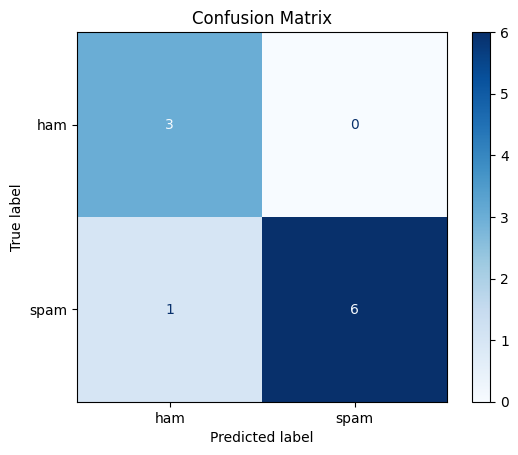

In [152]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['ham', 'spam'])

# Display it as a plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['ham', 'spam'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()